# 워드 클라우드(단어구름) 실습
### amueller의 wordcloud package를 이용한 mask를 활용한 wordcloud 만들기! [참고](https://github.com/kimyoungjin06/wordcloud/blob/master/Make_the_Word_Cloud.ipynb)

## 1. Package import & font, mask, message setup!

- 이 코드는 mask를 다루는 부분, font를 다루는 부분, word를 다루는 부분으로 나뉜다. 먼저 필요한 패키지들을 불러오는데, numpy와 random, palettable은 font 색 설정할 때, PIL은 mask 이미지를 처리할 때, wordcloud는 이 모든 것을 이용해서 word cloud를 그릴 때 이용된다.

- 아래에서 딱히 어려운 점은 없고, color_func가 여기서는 Dark2_8이라는 palette를 이용해서 색을 만들어낸다. Palette를 바꾸고 싶다면 이 부분을 바꾸면 될 것!

- *PIL은 python3에서는 Pillow로 설치하고 PIL로 사용하면 된다.

- *mask로 쓸 이미지는 png파일로 우리가 단어를 배치할 공간만 그림이 존재해야 한다. 나머지 공간엔 흰색이 아니라 아예 이미지가 없는 png파일이 필요하다.

In [2]:
## 오류가 나면 모듈을 설치해야 합니다.
## 아마도 아래와 같은 모듈 오류가 있을 겁니다.
# wordcloud 오류, palettable 오류
# 아래 명령어를 복사해서 anaconda prompt에서 수행하세요.
# conda install -c conda-forge wordcloud
# pip install palettable\

import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# color_func 함수, Dark2_8이라는 pallette를 이용하여 색을 만들어냄.
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

# 한글 폰트 지정
font = "NanumPen"
font_path = "%s.ttf" % font

# 아이콘 지정
icon = "Korea" 
icon_path = "%s.png" % icon

### 데이터 입력

In [7]:
# 연설문1
# 아래 KoreaSummit_Moon.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("swearing in the president Moon.txt", 'r', encoding='euc-kr')
message_of_moon = f.read()
print(message_of_moon)
f.close()

존경하고 사랑하는 국민 여러분, 감사합니다. 국민 여러분의 위대한 선택에 머리 숙여 깊이 감사드립니다. 저는 오늘 대한민국 제19대 대통령으로서 새로운 대한민국을 향해 첫걸음을 내딛습니다. 지금 제 두 어깨는 국민 여러분으로부터 부여받은 막중한 소명감으로 무겁습니다. 지금 제 가슴은 한번도 경험하지 못한 나라를 만들겠다는 열정으로 뜨겁습니다. 그리고 지금 제 머리는 통합과 공존의 새로운 세상을 열어갈 청사진으로 가득 차 있습니다.

우리가 만들어가려는 새로운 대한민국은 숱한 좌절과 패배에도 불구하고 우리의 선대들이 일관되게 추구했던 나라입니다. 또 많은 희생과 헌신을 감내하며 우리 젊은이들이 그토록 이루고 싶어했던 나라입니다. 그런 대한민국을 만들기 위해 저는 역사와 국민 앞에 두렵지만 겸허한 마음으로 대한민국 19대 대통령으로서의 책임과 소명을 다할 것임을 천명합니다. 대한민국의 위대함은 국민의 위대함입니다. 그리고 이번 대통령 선거에서 우리 국민은 또 하나의 역사를 만들어주셨습니다. 전국 각지에서 고른 지지로 새로운 대통령을 선택해주셨습니다. 오늘부터 저는 국민 모두의 대통령이 되겠습니다. 저를 지지하지 않았던 국민 한분 한분도 저의 국민이고 우리의 국민으로 섬기겠습니다. 저는 감히 약속 드립니다. 2017년 5월 10일, 이 날은 진정한 국민 통합이 시작된 날로 역사에 기록될 것입니다.

존경하고 사랑하는 국민 여러분, 힘들었던 지난 세월, 국민은 '이게 나라냐'고 물었습니다. 대통령 문재인은 바로 그 질문에서 새로 시작하겠습니다. 오늘부터 나라를 나라답게 만드는 대통령이 되겠습니다. 구시대의 잘못된 관행과 과감히 결별하겠습니다. 대통령부터 새로워지겠습니다.

우선 권위적인 대통령 문화를 청산하겠습니다. 준비를 마치는대로 지금의 청와대에서 나와 광화문 대통령 시대를 열겠습니다. 참모들과 머리와 어깨를 맞대고 토론하겠습니다. 국민과 수시로 소통하는 대통령이 되겠습니다. 주요 사안은 대통령이 직접 언론에 브리핑하겠습니다. 퇴근길에는 시장에 들러 마주치는 시민

In [11]:
# 연설문2
# 아래 speech.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("swaring in the president Trump.txt", 'r', encoding='euc-kr')
message_of_Trump = f.read()
print(message_of_Trump)
f.close()

로버츠 대법원장님, 카터 대통령님, 클린턴 대통령님, 부시 대통령님, 오바마 대통령님, 친애하는 미국인 여러분, 전 세계 여러분, 감사합니다.

우리 미국인들은 지금 이 나라를 재건하고 모든 사람들의 가능성을 회복하는 위대한 국가적 노력에 참여하고 있습니다.

아울러, 우리는 앞으로 수 년 간 미국과 세계가 가는 길을 결정할 것입니다. 우리는 도전에 직면할 것입니다. 우리는 역경에 부딪칠 것입니다. 그러나 우리는 그 일을 해낼 겁니다.

우리는 질서있고 평화로운 정권교체를 위해 4년마다 이 자리에 모입니다.
정권교체 과정에서 보여준 오바마 대통령과 미셸 여사의 우아하고 사려 깊은 도움에 감사합니다.

그러나 오늘의 이 행사는 매우 특별한 의미가 있습니다. 오늘은 우리가 단지 행정부를 다른 사람이나 다른 정당에게 넘기는 것이 아니라, 권력을 워싱턴DC에서 미국인 여러분들에게 이양하는 날입니다.

너무나 오랫동안 이 나라 수도의 소수 그룹이 정부가 누리는 보상을 가져가는 동안 국민들은 그 비용을 떠안았습니다.

워싱턴은 번창했지만 국민들은 그 부를 나누지 못했습니다. 정치인들은 번영을 누렸지만 일자리는 떠났고 공장은 문을 닫았습니다.

기득권세력이 지킨 건 자기 자신들이었지, 이 나라 국민들이 아니었습니다.
그들의 승리는 여러분의 승리가 아니었으며, 그들의 전리품은 여러분의 전리품이 아니었습니다. 그들이 우리나라 수도에서 환호하는 동안 이 나라 곳곳에서 고통받는 가족들이 환호할 곳은 없었습니다.

그 모든 것이 달라집니다. 그 변화는 지금 여기에서 시작합니다. 이 순간은 여러분의 것입니다. 이 순간은 오늘 여기 모인 이들과 미 전역에서 지켜보는 모든 이들의 것입니다. 오늘은 여러분의 것입니다. 여러분이 축하받을 일입니다. 그리고 미합중국은 여러분의 나라입니다.

진정 중요한 것은 어떤 정당이 정부를 통제하느냐가 아니라, 국민들이 정부를 통제하느냐입니다.

2017년 1월 20일은 국민이 다시 이 나라의 통치자가 된 날로 기억될 것입니다.

이 나라의 잊혀진 사람들

## 2. Load the mask, font coloring, generate word cloud!
- 먼저 icon에 image를 불러오고, mask를 RGB type으로 icon과 같은 사이즈로 전부 (255,255,255)값 (아마 흰색?)으로 만들어내고, 이 (255,255,255)가 이미지가 채워지지 않는 부분을 의미한다. (?Image.new를 참고!), 그리고 나서 이 mask에 아까 불러온 icon의 형상을 붙여넣는다. 그리고 나서 이를 nparray로 만든다.

- 이제 만들어놓은 mask와 불러놨던 font를 이용하여 WordCloud함수를 이용해 wordcloud를 만들어내고, WordCloud.recolor를 이용해서 아까 만들어놓은 color_func()를 사용해 불러온 palette를 이용해 색을 입힌다. 그리고 저장하면 끝!



# 남북정상회담 두 정상의 대화문 워드 클라우드
[연설문 시각화](https://github.com/eventia/CandSpeech/blob/master/wordcloud.py)

In [12]:
# 연설문 1번 전처리
message_of_moon = message_of_moon.split('\n\n')
message_of_moon

['존경하고 사랑하는 국민 여러분, 감사합니다. 국민 여러분의 위대한 선택에 머리 숙여 깊이 감사드립니다. 저는 오늘 대한민국 제19대 대통령으로서 새로운 대한민국을 향해 첫걸음을 내딛습니다. 지금 제 두 어깨는 국민 여러분으로부터 부여받은 막중한 소명감으로 무겁습니다. 지금 제 가슴은 한번도 경험하지 못한 나라를 만들겠다는 열정으로 뜨겁습니다. 그리고 지금 제 머리는 통합과 공존의 새로운 세상을 열어갈 청사진으로 가득 차 있습니다.',
 '우리가 만들어가려는 새로운 대한민국은 숱한 좌절과 패배에도 불구하고 우리의 선대들이 일관되게 추구했던 나라입니다. 또 많은 희생과 헌신을 감내하며 우리 젊은이들이 그토록 이루고 싶어했던 나라입니다. 그런 대한민국을 만들기 위해 저는 역사와 국민 앞에 두렵지만 겸허한 마음으로 대한민국 19대 대통령으로서의 책임과 소명을 다할 것임을 천명합니다. 대한민국의 위대함은 국민의 위대함입니다. 그리고 이번 대통령 선거에서 우리 국민은 또 하나의 역사를 만들어주셨습니다. 전국 각지에서 고른 지지로 새로운 대통령을 선택해주셨습니다. 오늘부터 저는 국민 모두의 대통령이 되겠습니다. 저를 지지하지 않았던 국민 한분 한분도 저의 국민이고 우리의 국민으로 섬기겠습니다. 저는 감히 약속 드립니다. 2017년 5월 10일, 이 날은 진정한 국민 통합이 시작된 날로 역사에 기록될 것입니다.',
 "존경하고 사랑하는 국민 여러분, 힘들었던 지난 세월, 국민은 '이게 나라냐'고 물었습니다. 대통령 문재인은 바로 그 질문에서 새로 시작하겠습니다. 오늘부터 나라를 나라답게 만드는 대통령이 되겠습니다. 구시대의 잘못된 관행과 과감히 결별하겠습니다. 대통령부터 새로워지겠습니다.",
 '우선 권위적인 대통령 문화를 청산하겠습니다. 준비를 마치는대로 지금의 청와대에서 나와 광화문 대통령 시대를 열겠습니다. 참모들과 머리와 어깨를 맞대고 토론하겠습니다. 국민과 수시로 소통하는 대통령이 되겠습니다. 주요 사안은 대통령이 직접 언론에 브리핑하겠습니다. 퇴근길에는 시장에

In [13]:
# 연설문 2번 전처리
message_of_Trump = message_of_Trump.split('\n\n')
message_of_Trump

['로버츠 대법원장님, 카터 대통령님, 클린턴 대통령님, 부시 대통령님, 오바마 대통령님, 친애하는 미국인 여러분, 전 세계 여러분, 감사합니다.',
 '우리 미국인들은 지금 이 나라를 재건하고 모든 사람들의 가능성을 회복하는 위대한 국가적 노력에 참여하고 있습니다.',
 '아울러, 우리는 앞으로 수 년 간 미국과 세계가 가는 길을 결정할 것입니다. 우리는 도전에 직면할 것입니다. 우리는 역경에 부딪칠 것입니다. 그러나 우리는 그 일을 해낼 겁니다.',
 '우리는 질서있고 평화로운 정권교체를 위해 4년마다 이 자리에 모입니다.\n정권교체 과정에서 보여준 오바마 대통령과 미셸 여사의 우아하고 사려 깊은 도움에 감사합니다.',
 '그러나 오늘의 이 행사는 매우 특별한 의미가 있습니다. 오늘은 우리가 단지 행정부를 다른 사람이나 다른 정당에게 넘기는 것이 아니라, 권력을 워싱턴DC에서 미국인 여러분들에게 이양하는 날입니다.',
 '너무나 오랫동안 이 나라 수도의 소수 그룹이 정부가 누리는 보상을 가져가는 동안 국민들은 그 비용을 떠안았습니다.',
 '워싱턴은 번창했지만 국민들은 그 부를 나누지 못했습니다. 정치인들은 번영을 누렸지만 일자리는 떠났고 공장은 문을 닫았습니다.',
 '기득권세력이 지킨 건 자기 자신들이었지, 이 나라 국민들이 아니었습니다.\n그들의 승리는 여러분의 승리가 아니었으며, 그들의 전리품은 여러분의 전리품이 아니었습니다. 그들이 우리나라 수도에서 환호하는 동안 이 나라 곳곳에서 고통받는 가족들이 환호할 곳은 없었습니다.',
 '그 모든 것이 달라집니다. 그 변화는 지금 여기에서 시작합니다. 이 순간은 여러분의 것입니다. 이 순간은 오늘 여기 모인 이들과 미 전역에서 지켜보는 모든 이들의 것입니다. 오늘은 여러분의 것입니다. 여러분이 축하받을 일입니다. 그리고 미합중국은 여러분의 나라입니다.',
 '진정 중요한 것은 어떤 정당이 정부를 통제하느냐가 아니라, 국민들이 정부를 통제하느냐입니다.',
 '2017년 1월 20일은 국민이 다시 이 나라의 

In [14]:
# 연설문 1번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus1 = tf_vectorizer.fit(message_of_moon)
tf_bow1 = tf_vectorizer.fit_transform(message_of_moon)
tf_bow1

<12x491 sparse matrix of type '<class 'numpy.int64'>'
	with 598 stored elements in Compressed Sparse Row format>

In [15]:
# 연설문 2번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus2 = tf_vectorizer.fit(message_of_Trump)
tf_bow2 = tf_vectorizer.fit_transform(message_of_Trump)
tf_bow2

<55x578 sparse matrix of type '<class 'numpy.int64'>'
	with 764 stored elements in Compressed Sparse Row format>

In [16]:
# 연설문 1 
# check vocabulary in TDM
print(len(tf_corpus1.vocabulary_))
print(len(tf_corpus1.get_feature_names()))
tf_vectorizer.get_feature_names()

491
491


['1월',
 '2017년',
 '20일은',
 '4년마다',
 'america',
 'first',
 '가난에',
 '가는',
 '가능성을',
 '가득',
 '가슴에는',
 '가장',
 '가정을',
 '가정의',
 '가져가는',
 '가족들에게',
 '가족들이',
 '가지',
 '갇혀있습니다',
 '갈색이든지',
 '감사합니다',
 '강령을',
 '강요하지',
 '강한',
 '강화시킬',
 '강화하고',
 '같습니다',
 '같은',
 '갱들과',
 '건설할',
 '걸쳐',
 '검든지',
 '겁니다',
 '것도',
 '것은',
 '것이',
 '것이고',
 '것입니다',
 '결정할',
 '결코',
 '경의를',
 '경찰의',
 '고갈됐습니다',
 '고속도로',
 '고용하는',
 '고통받는',
 '고통에서',
 '고통은',
 '고통입니다',
 '곳곳에',
 '곳곳에서',
 '곳은',
 '곳이',
 '공간의',
 '공장은',
 '공직',
 '공항',
 '과거입니다',
 '과격한',
 '과정에서',
 '교육시스템에',
 '국가는',
 '국가적',
 '국경을',
 '국기에',
 '국민들에게',
 '국민들은',
 '국민들이',
 '국민이',
 '군대는',
 '군대와',
 '권력을',
 '권력자들은',
 '권리가',
 '귀를',
 '규칙을',
 '그것은',
 '그들의',
 '그들이',
 '그러나',
 '그러므로',
 '그렇게',
 '그렇습니다',
 '그룹이',
 '그리고',
 '그리하여',
 '근로자와',
 '기득권세력이',
 '기반에는',
 '기쁜가',
 '기술을',
 '기억될',
 '기업을',
 '기울일',
 '길을',
 '깊은',
 '꿈으로',
 '꿈은',
 '꿈을',
 '꿈입니다',
 '꿔야',
 '끊임없이',
 '끝났습니다',
 '나누고',
 '나누지',
 '나눕니다',
 '나는',
 '나라',
 '나라는',
 '나라들과',
 '나라를',
 '나라에',
 '나라의',
 '나라입니다',
 '나지만',
 '날로',
 '날입니다',
 '남겨진',
 '내가',
 '너무나'

In [17]:
# 연설문 2
# check vocabulary in TDM
print(len(tf_corpus2.vocabulary_))
print(len(tf_corpus2.get_feature_names()))
tf_vectorizer.get_feature_names()

578
578


['1월',
 '2017년',
 '20일은',
 '4년마다',
 'america',
 'first',
 '가난에',
 '가는',
 '가능성을',
 '가득',
 '가슴에는',
 '가장',
 '가정을',
 '가정의',
 '가져가는',
 '가족들에게',
 '가족들이',
 '가지',
 '갇혀있습니다',
 '갈색이든지',
 '감사합니다',
 '강령을',
 '강요하지',
 '강한',
 '강화시킬',
 '강화하고',
 '같습니다',
 '같은',
 '갱들과',
 '건설할',
 '걸쳐',
 '검든지',
 '겁니다',
 '것도',
 '것은',
 '것이',
 '것이고',
 '것입니다',
 '결정할',
 '결코',
 '경의를',
 '경찰의',
 '고갈됐습니다',
 '고속도로',
 '고용하는',
 '고통받는',
 '고통에서',
 '고통은',
 '고통입니다',
 '곳곳에',
 '곳곳에서',
 '곳은',
 '곳이',
 '공간의',
 '공장은',
 '공직',
 '공항',
 '과거입니다',
 '과격한',
 '과정에서',
 '교육시스템에',
 '국가는',
 '국가적',
 '국경을',
 '국기에',
 '국민들에게',
 '국민들은',
 '국민들이',
 '국민이',
 '군대는',
 '군대와',
 '권력을',
 '권력자들은',
 '권리가',
 '귀를',
 '규칙을',
 '그것은',
 '그들의',
 '그들이',
 '그러나',
 '그러므로',
 '그렇게',
 '그렇습니다',
 '그룹이',
 '그리고',
 '그리하여',
 '근로자와',
 '기득권세력이',
 '기반에는',
 '기쁜가',
 '기술을',
 '기억될',
 '기업을',
 '기울일',
 '길을',
 '깊은',
 '꿈으로',
 '꿈은',
 '꿈을',
 '꿈입니다',
 '꿔야',
 '끊임없이',
 '끝났습니다',
 '나누고',
 '나누지',
 '나눕니다',
 '나는',
 '나라',
 '나라는',
 '나라들과',
 '나라를',
 '나라에',
 '나라의',
 '나라입니다',
 '나지만',
 '날로',
 '날입니다',
 '남겨진',
 '내가',
 '너무나'

In [18]:
# 연설문 1
# frequency count
tf_word_sum1 = tf_bow1.toarray().sum(axis=0)
tf_word_name1 = tf_corpus1.get_feature_names()
tf_word_dict1 = {}

for i in range(len(tf_word_sum1)):
    tf_word_dict1[tf_word_name1[i]] = tf_word_sum1[i]
    
print(tf_corpus1.get_feature_names())
tf_word_sum1

['10일', '19대', '2017년', '5월', '5월10일', '가겠습니다', '가고', '가까운', '가능할', '가득', '가슴은', '가장', '각지에서', '갈등은', '갈등을', '갈등의', '감내하며', '감사드립니다', '감사의', '감사합니다', '감히', '강력한', '강화하겠습니다', '강화하기', '같은', '개혁에도', '거듭', '거짓으로', '것임을', '것입니다', '격변기를', '격의', '견제', '결과는', '결별하겠습니다', '겸손한', '겸허한', '경쟁의', '경제가', '경험하지', '계기로', '계속되고', '계층과', '고르게', '고른', '고향으로', '곧바로', '곳에', '공정한', '공정할', '공존의', '과감히', '과정에서', '과정은', '관행과', '광장에서', '광화문', '구속', '구시대의', '국민', '국민과', '국민으로', '국민은', '국민의', '국민이', '국민이고', '국방력에서', '국방력을', '국정운영의', '군림하고', '권력기관은', '권력을', '권력이', '권위적인', '그래서', '그런', '그리고', '그토록', '기관도', '기록될', '기회는', '긴장완화의', '길에', '길을', '깊이', '깨끗한', '꼼꼼하게', '끝나야', '나누겠습니다', '나눌', '나라', '나라냐', '나라답게', '나라를', '나라입니다', '나서서', '나와', '날로', '날아가겠습니다', '날은', '남겠습니다', '낮은', '내딛습니다', '노력하겠습니다', '노심초사', '눈높이를', '눈물을', '능력과', '다시', '다하겠습니다', '다할', '닦아드리는', '대역사가', '대원칙으로', '대토론회를', '대통령', '대통령부터', '대통령으로', '대통령으로서', '대통령으로서의', '대통령을', '대통령의', '대통령이', '대한', '대한민국', '대한민국은', '대한민국을', '대한민국의', '대한민국이', '대화를', '대화하겠습니다', '대화하고

array([ 1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  6,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  1,  1,  1,  3,  1,  1, 12,  4,  1,  4,  2,  2,  1,  1,  1,
        1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  1,  1,  1,  2,  4,  2,  1,  1,  1,  1,  1,  2,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  6,  2,  1,  1,
        1,  1,  5, 17,  1,  3,  1,  3,  2,  1,  2,  1,  1,  1,  1,  1,  1,
        1,  1,  2,  1,  1,  1, 13,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  2,  1,  1,  1,  1,  1,  1,  2,  1,  5,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  2,  1,  1,  1,
        1,  2,  1,  1,  1

In [19]:
# 연설문 2
# frequency count
tf_word_sum2 = tf_bow2.toarray().sum(axis=0)
tf_word_name2 = tf_corpus2.get_feature_names()
tf_word_dict2 = {}

for i in range(len(tf_word_sum2)):
    tf_word_dict2[tf_word_name2[i]] = tf_word_sum2[i]
    
print(tf_corpus2.get_feature_names())
tf_word_sum2

['1월', '2017년', '20일은', '4년마다', 'america', 'first', '가난에', '가는', '가능성을', '가득', '가슴에는', '가장', '가정을', '가정의', '가져가는', '가족들에게', '가족들이', '가지', '갇혀있습니다', '갈색이든지', '감사합니다', '강령을', '강요하지', '강한', '강화시킬', '강화하고', '같습니다', '같은', '갱들과', '건설할', '걸쳐', '검든지', '겁니다', '것도', '것은', '것이', '것이고', '것입니다', '결정할', '결코', '경의를', '경찰의', '고갈됐습니다', '고속도로', '고용하는', '고통받는', '고통에서', '고통은', '고통입니다', '곳곳에', '곳곳에서', '곳은', '곳이', '공간의', '공장은', '공직', '공항', '과거입니다', '과격한', '과정에서', '교육시스템에', '국가는', '국가적', '국경을', '국기에', '국민들에게', '국민들은', '국민들이', '국민이', '군대는', '군대와', '권력을', '권력자들은', '권리가', '귀를', '규칙을', '그것은', '그들의', '그들이', '그러나', '그러므로', '그렇게', '그렇습니다', '그룹이', '그리고', '그리하여', '근로자와', '기득권세력이', '기반에는', '기쁜가', '기술을', '기억될', '기업을', '기울일', '길을', '깊은', '꿈으로', '꿈은', '꿈을', '꿈입니다', '꿔야', '끊임없이', '끝났습니다', '나누고', '나누지', '나눕니다', '나는', '나라', '나라는', '나라들과', '나라를', '나라에', '나라의', '나라입니다', '나지만', '날로', '날입니다', '남겨진', '내가', '너무나', '넘기는', '넘쳐', '네브라스카의', '년의', '노동자들을', '노력에', '노력으로', '녹슨', '놓일', '누구에게', '누렸지만', '누리고', '누리는', '누릴', '다른', '다리', '다스립

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,
        1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 10,  1,
        1,  2,  1, 32,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  3,  1,  1,  1,  2,  1,  1,  2,  2,  3,  1,  2,  2,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  5,  1,  6,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  1,  1,  1,
        1,  2,  1,  1,  1,  5,  1,  1,  5,  1,  5,  2,  1,  1,  1,  1,  1,
        3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  9,  1,
        1,  8,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        4,  3,  1,  1,  1,  1,  1,  1,  1,  1,  2,  4,  1,  4,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,  4,  1,  1,  1,
        2,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  2, 13,  2,  1,  1,  1,
        1,  2,  1,  1,  1,  1,  3,  1,  2,  1,  1,  1,  2,  5,  5,  1,  5,
        2,  2,  1,  1,  1

In [20]:
# 연설문 1
# 단어별 글자수 확인
tf_word_dict1

{'10일': 1,
 '19대': 1,
 '2017년': 2,
 '5월': 1,
 '5월10일': 1,
 '가겠습니다': 1,
 '가고': 1,
 '가까운': 1,
 '가능할': 1,
 '가득': 1,
 '가슴은': 1,
 '가장': 1,
 '각지에서': 1,
 '갈등은': 1,
 '갈등을': 1,
 '갈등의': 1,
 '감내하며': 1,
 '감사드립니다': 1,
 '감사의': 1,
 '감사합니다': 1,
 '감히': 1,
 '강력한': 1,
 '강화하겠습니다': 1,
 '강화하기': 1,
 '같은': 1,
 '개혁에도': 1,
 '거듭': 1,
 '거짓으로': 1,
 '것임을': 1,
 '것입니다': 6,
 '격변기를': 1,
 '격의': 1,
 '견제': 1,
 '결과는': 1,
 '결별하겠습니다': 1,
 '겸손한': 1,
 '겸허한': 1,
 '경쟁의': 1,
 '경제가': 1,
 '경험하지': 1,
 '계기로': 2,
 '계속되고': 1,
 '계층과': 1,
 '고르게': 1,
 '고른': 1,
 '고향으로': 1,
 '곧바로': 1,
 '곳에': 1,
 '공정한': 1,
 '공정할': 1,
 '공존의': 1,
 '과감히': 1,
 '과정에서': 2,
 '과정은': 1,
 '관행과': 1,
 '광장에서': 1,
 '광화문': 3,
 '구속': 1,
 '구시대의': 1,
 '국민': 12,
 '국민과': 4,
 '국민으로': 1,
 '국민은': 4,
 '국민의': 2,
 '국민이': 2,
 '국민이고': 1,
 '국방력에서': 1,
 '국방력을': 1,
 '국정운영의': 1,
 '군림하고': 1,
 '권력기관은': 1,
 '권력을': 2,
 '권력이': 1,
 '권위적인': 1,
 '그래서': 1,
 '그런': 1,
 '그리고': 2,
 '그토록': 1,
 '기관도': 1,
 '기록될': 1,
 '기회는': 1,
 '긴장완화의': 1,
 '길에': 1,
 '길을': 1,
 '깊이': 1,
 '깨끗한': 1,
 '꼼꼼하게': 1,
 '끝나야': 1,
 '

In [21]:
# 연설문 2
# 단어별 글자수 확인
tf_word_dict2

{'1월': 1,
 '2017년': 1,
 '20일은': 1,
 '4년마다': 1,
 'america': 1,
 'first': 1,
 '가난에': 1,
 '가는': 1,
 '가능성을': 1,
 '가득': 1,
 '가슴에는': 1,
 '가장': 2,
 '가정을': 1,
 '가정의': 1,
 '가져가는': 1,
 '가족들에게': 1,
 '가족들이': 1,
 '가지': 1,
 '갇혀있습니다': 1,
 '갈색이든지': 1,
 '감사합니다': 3,
 '강령을': 1,
 '강요하지': 1,
 '강한': 1,
 '강화시킬': 1,
 '강화하고': 1,
 '같습니다': 1,
 '같은': 1,
 '갱들과': 1,
 '건설할': 1,
 '걸쳐': 1,
 '검든지': 1,
 '겁니다': 10,
 '것도': 1,
 '것은': 1,
 '것이': 2,
 '것이고': 1,
 '것입니다': 32,
 '결정할': 2,
 '결코': 1,
 '경의를': 1,
 '경찰의': 1,
 '고갈됐습니다': 1,
 '고속도로': 1,
 '고용하는': 1,
 '고통받는': 1,
 '고통에서': 1,
 '고통은': 1,
 '고통입니다': 1,
 '곳곳에': 1,
 '곳곳에서': 1,
 '곳은': 1,
 '곳이': 1,
 '공간의': 1,
 '공장은': 3,
 '공직': 1,
 '공항': 1,
 '과거입니다': 1,
 '과격한': 2,
 '과정에서': 1,
 '교육시스템에': 1,
 '국가는': 2,
 '국가적': 2,
 '국경을': 3,
 '국기에': 1,
 '국민들에게': 2,
 '국민들은': 2,
 '국민들이': 2,
 '국민이': 1,
 '군대는': 1,
 '군대와': 1,
 '권력을': 1,
 '권력자들은': 1,
 '권리가': 1,
 '귀를': 1,
 '규칙을': 1,
 '그것은': 1,
 '그들의': 5,
 '그들이': 1,
 '그러나': 6,
 '그러므로': 1,
 '그렇게': 1,
 '그렇습니다': 1,
 '그룹이': 1,
 '그리고': 1,
 '그리하여': 1,
 '근로자와': 1,
 '기

### 시각화

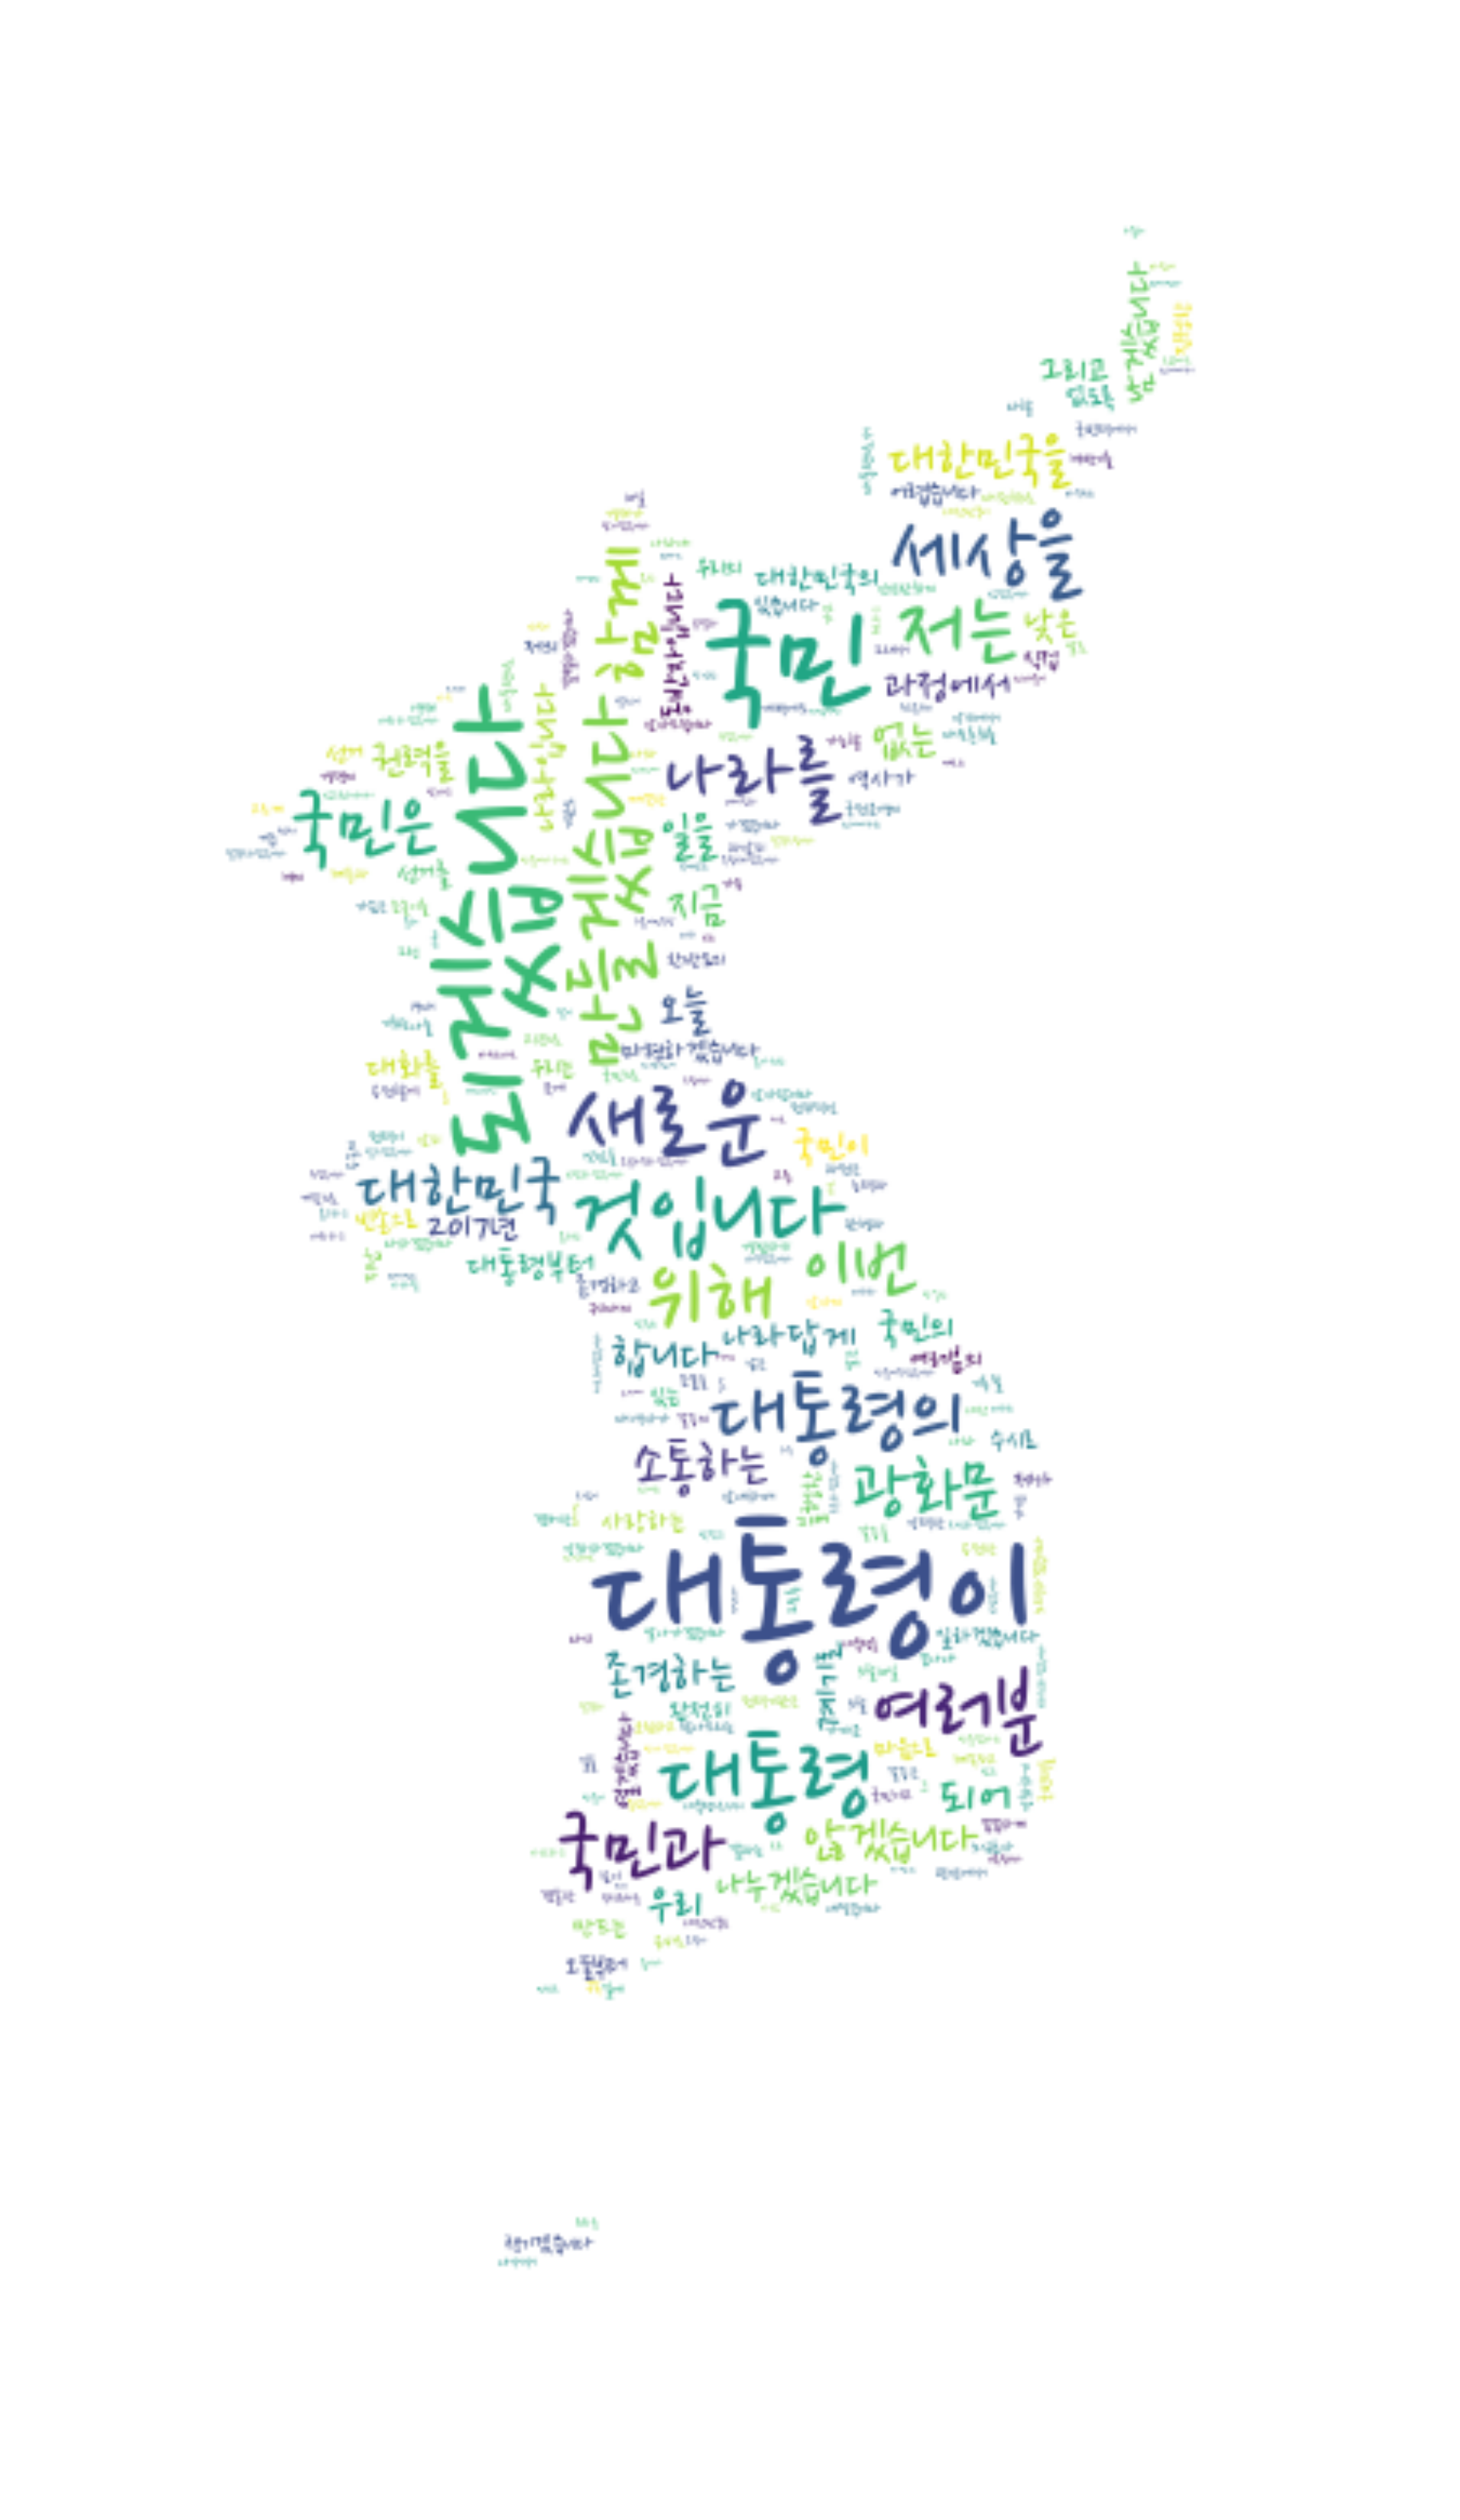

In [23]:
# 연설문 1
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict1)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("MoonSpeech.png") # 그림파일로 추출하기

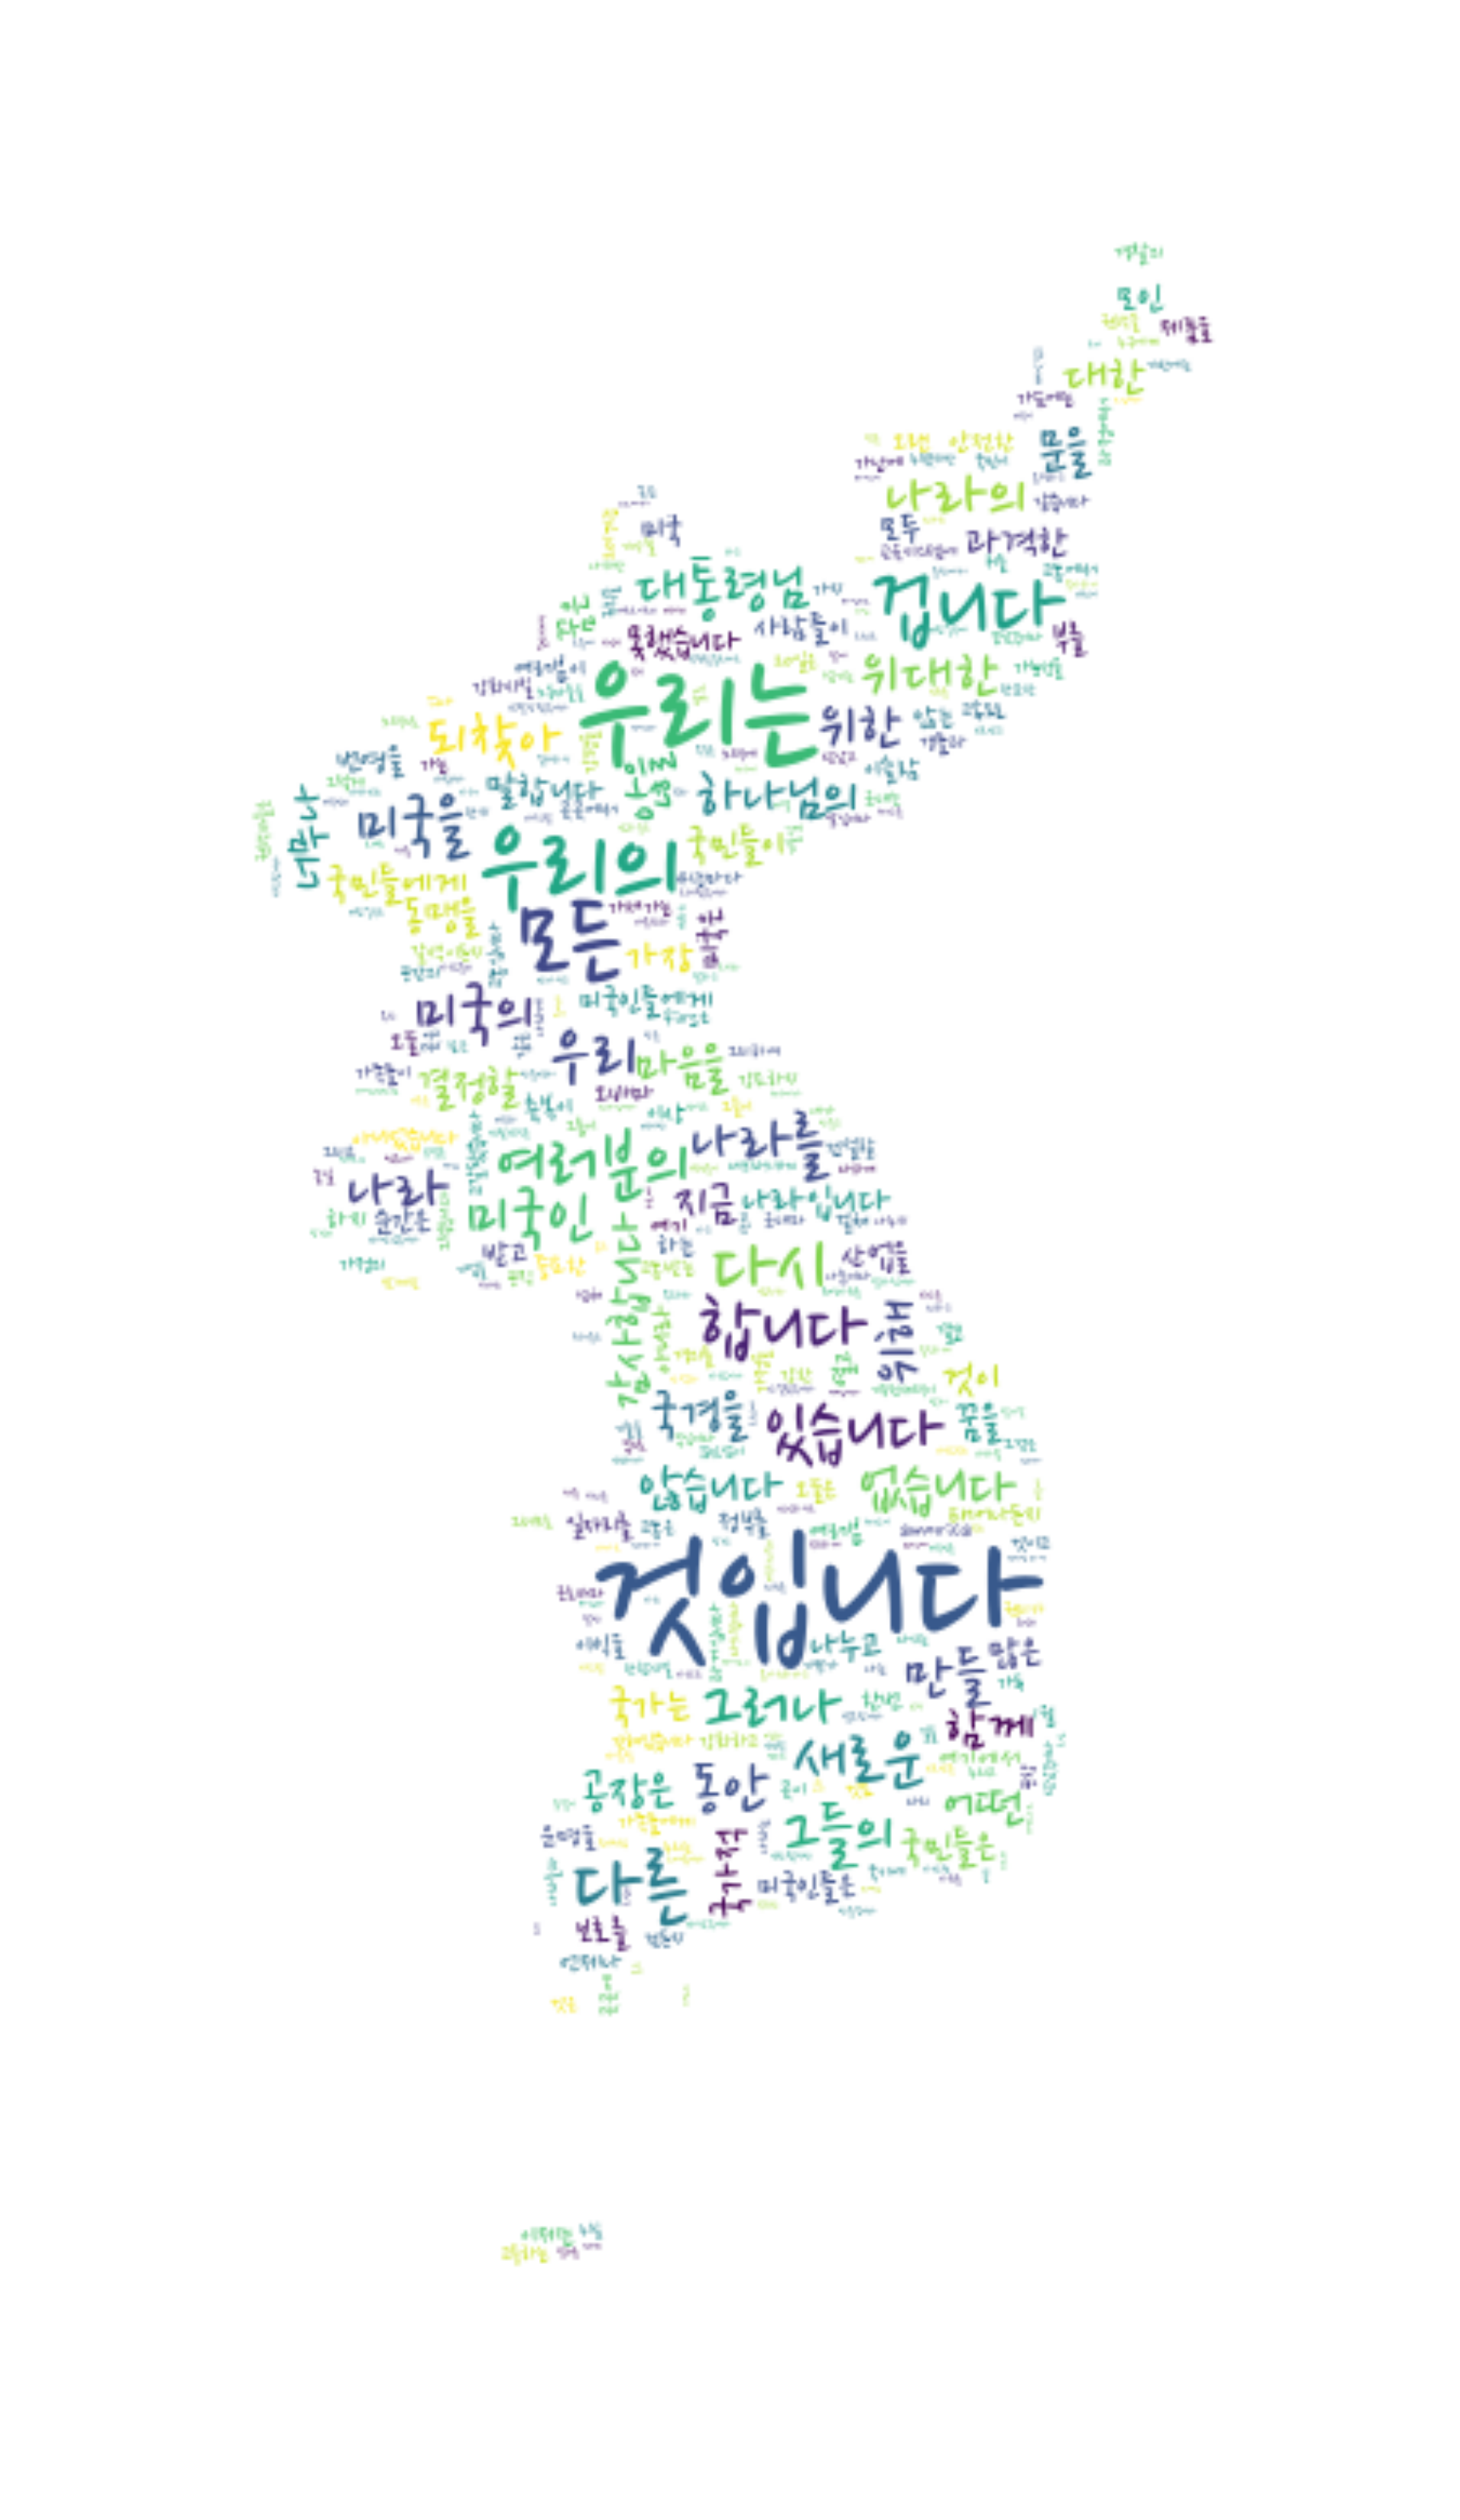

In [24]:
# 연설문 2
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict2)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("KimSpeech.png") # 그림파일로 추출하기